In [1]:
include("./params.jl")
using JSON
using CSV, DataFrames
using Plots
using Statistics

In [2]:
datapath = "L400/"
fn_config = "config-sample"

"config-sample"

In [3]:
config  = JSON.parsefile(fn_config)
params = readconfig(config)

Params
  L: Int64 400
  θ: Array{Float64}((3,)) [0.01, 0.125, 0.25]
  W: Array{Float64}((1,)) [0.0]
  E_edges: Array{Float64}((101,)) [1.0e-10, 1.2589254117941662e-10, 1.584893192461111e-10, 1.9952623149688828e-10, 2.511886431509582e-10, 3.1622776601683795e-10, 3.9810717055349694e-10, 5.011872336272714e-10, 6.309573444801942e-10, 7.943282347242822e-10  …  0.12589254117941673, 0.15848931924611134, 0.19952623149688797, 0.251188643150958, 0.31622776601683794, 0.3981071705534972, 0.5011872336272722, 0.6309573444801932, 0.7943282347242815, 1.0]
  seed: Int64 1234
  R: Int64 1000
  V: Float64 1.0
  num_blas: Int64 1
  energy_path: String "energyfile"


In [4]:
function get_datafn(i, j)
    return "Th$(lpad(i, 2, "0"))_W$(lpad(j, 2, "0")).csv"
end

get_datafn (generic function with 1 method)

In [5]:
df = [CSV.read(datapath*get_datafn(i, j), DataFrame) for i in 1:length(params.θ), j in 1:length(params.W)]

3×1 Matrix{DataFrame}:
 100×4 DataFrame
 Row │ E            E_idx  weight  dos        
     │ Float64      Int64  Int64   Float64    
─────┼────────────────────────────────────────
   1 │ 4.19548e-13      1      17  1.76752e14
   2 │ 5.28179e-13      2      11  9.08466e13
   3 │ 6.64938e-13      3      21  1.37764e14
   4 │ 8.37107e-13      4      16  8.3375e13
   5 │ 1.05386e-12      5      10  4.1392e13
   6 │ 1.32673e-12      6      10  3.28788e13
   7 │ 1.67025e-12      7      19  4.96215e13
   8 │ 2.10272e-12      8      12  2.48941e13
   9 │ 2.64717e-12      9      10  1.64784e13
  10 │ 3.33258e-12     10      12  1.57071e13
  11 │ 4.19548e-12     11      10  1.03972e13
  ⋮  │      ⋮         ⋮      ⋮         ⋮
  91 │ 0.000419548     91    7724  8.03079e7
  92 │ 0.000528179     92   10017  8.27282e7
  93 │ 0.000664938     93   12325  8.08543e7
  94 │ 0.000837107     94   15316  7.98107e7
  95 │ 0.00105386      95   19139  7.92201e7
  96 │ 0.00132673      96   22899  7.52892e7
  97

In [6]:
df1 = df[1]

,E,E_idx,weight,dos
,Float64,Int64,Int64,Float64
1,4.19548e-13,1,17,1.76752e14
2,5.28179e-13,2,11,9.08466e13
3,6.64938e-13,3,21,1.37764e14
4,8.37107e-13,4,16,8.3375e13
5,1.05386e-12,5,10,4.1392e13
6,1.32673e-12,6,10,3.28788e13
7,1.67025e-12,7,19,4.96215e13
8,2.10272e-12,8,12,2.48941e13
9,2.64717e-12,9,10,1.64784e13


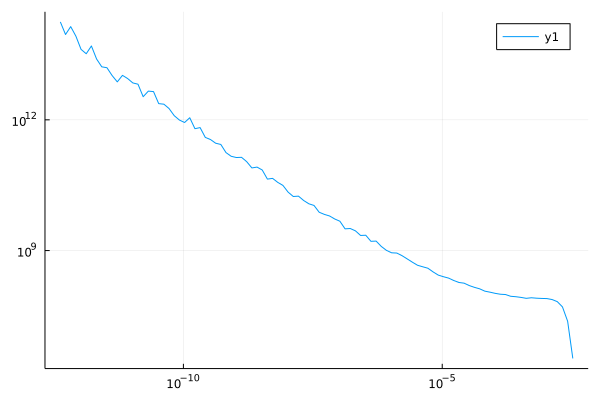

In [7]:
plot(df1.E, df1.dos, yaxis = :log10, xaxis = :log10)